In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

### <span style='color:green'> **[done]** </span>Loading Features data

In [2]:
loc = '../data/'
file = 'fight_stat_data_trained.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.478152,0.478152,0.478152,0.478152
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,0.057777,0.057777,0.057777,0.057777
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.384735,0.384735,0.384735,0.384735


In [3]:
req_data = ['set','date','fighter','opponent']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win
6730,train,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win


## <span style='color:green'> **[done]** </span> KNN classifier model training:

In [4]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 21), train_set=(3267, 16), validation_set=(1463, 16), test_set=(2001, 16)


,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win


In [5]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=df)
df = set_predictions(model=knn_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


Accuracy = 0.787106


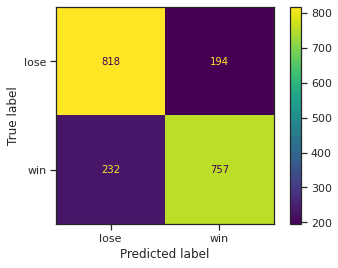

In [6]:
get_model_evaluation(data=df)

### <span style='color:green'> **[done]** </span> Tune model parameters:

In [7]:
knn_opt = pd.DataFrame(columns=['neighbors','accuracy'])

for n in tqdm([1,2,4,8,16,32,64,128,145,175,200,256]):
    knn_opt = pd.concat([knn_opt, get_knn_grad_step( X_columns=X, y_columns=y, data=df, neighbors=n)], ignore_index=True)
        
max_stat_knn = knn_opt[knn_opt.accuracy==np.max(knn_opt.accuracy)].reset_index(drop=True)
print('Best Model:')
max_stat_knn

100%|██████████| 12/12 [00:05<00:00,  2.05it/s]

Best Model:


,neighbors,accuracy
0,145,0.837321


<AxesSubplot:xlabel='neighbors', ylabel='accuracy'>

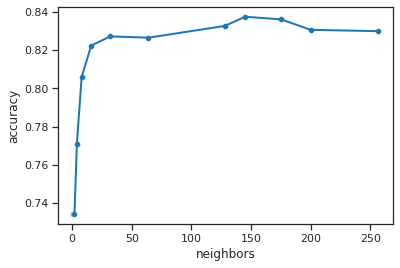

In [8]:
sns.lineplot(data=knn_opt, y='accuracy', x='neighbors')
sns.scatterplot(data=knn_opt, y='accuracy', x='neighbors')

In [9]:
# get best knn parameters to save:
param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns='Unnamed: 0')
param = param[param.ml_model=='knn_reg']

knn_clf_param = pd.DataFrame(data={'ml_model':['knn_clf'],
                           'parameter_name':[max_stat_knn.columns[0]],
                           'value':[max_stat_knn.loc[0,'neighbors']],
                           'accuracy':[max_stat_knn.loc[0,'accuracy']]}
                    )
param = pd.concat([param,knn_clf_param])
param

,ml_model,parameter_name,value,accuracy
0,knn_reg,neighbors,29,0.681000
0,knn_clf,neighbors,145,0.837321


In [10]:
param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


### <span style='color:green'> **[done]** </span> Train optimized model:

In [11]:
n = get_knn_clf_param(filename='../global_variables/ml_models_parameters.csv')

knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=df, neighbors=n)
df = set_predictions(model=knn_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,validation,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


Accuracy = 0.835082


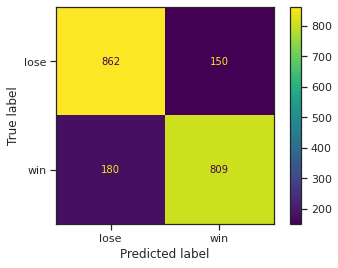

In [12]:
get_model_evaluation(data=df)

In [13]:
df.to_csv('../data/fight_results_data_trained.csv')
print('../data/fight_results_data_trained.csv saved.')

../data/fight_results_data_trained.csv saved.


## <span style='color:orange'> **[in-progress]** </span> Random forest classifier model training:

In [14]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 22), train_set=(3276, 16), validation_set=(1425, 16), test_set=(2030, 16)


,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,test,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,test,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


In [15]:
rf_clf = set_random_forest_clf(X_columns=X, y_columns=y, data=df, n=800)
df = set_predictions(model=rf_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,date,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,2017-07-29,Aleksandra Albu,Kailin Curran,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,win,win
6729,test,2017-07-29,Jarred Brooks,Eric Shelton,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,win,win
6730,test,2017-07-29,Drew Dober,Joshua Burkman,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,win,win


Accuracy = 0.866502


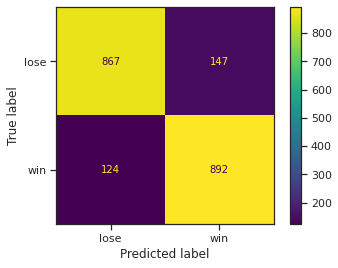

In [16]:
get_model_evaluation(data=df)